In [1]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

from astropy.wcs import WCS
from astropy import wcs
import sys
from astropy.visualization import make_lupton_rgb
from sklearn import preprocessing #only works for dimensions <=2

#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats
from scipy import ndimage

In [2]:
#Fitting a Gaussian

location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_south.fits"

hdul = fits.open(location)

hdu_zero_south = hdul[0]

co_zero_south = hdu_zero_south.data

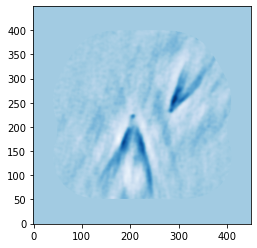

In [3]:
plt.imshow(co_zero_south,cmap='Blues',origin='lower')
#convert single gauss to double gauss (similar procedure)
#if not working, write down why, then try image rotation with seperating sides
#image rotation for other outflow (same tech)

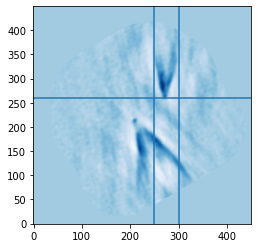

In [4]:
im_rot = ndimage.rotate(co_zero_south, angle=-30,reshape=False)
plt.imshow(im_rot,cmap='Blues',origin='lower')

plt.axvline(250) 
plt.axvline(300) 
plt.axhline(260)

# Defining and fitting double gaussian to a single cut

[2168.17742052  264.9488547     5.08049667 1406.06484529  282.58736867
    4.56209837]


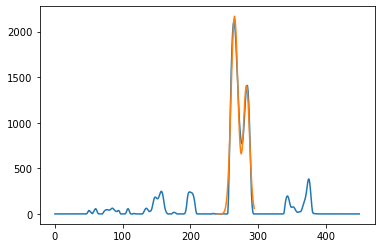

In [5]:
#Creating single cut

cut = im_rot[300:310,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)

#Defining Double Gaussian

def Double_Gauss(x,amp_1,mean_1,sigma_1,amp_2,mean_2,sigma_2):
    f = (amp_1 * np.exp(-(x - mean_1)**2/(2*sigma_1**2))+ amp_2 * np.exp(-(x-mean_2)**2/(2*sigma_2**2)))
    return f

xdata = np.arange(240,295)
ydata = avg_cut[240:295]
# x2data = np.arange(275,295)
# y2data = avg_cut[275:295]


p0 = (np.max(ydata),xdata[np.argmax(ydata)],5,np.max(ydata),xdata[np.argmax(ydata)]+10,5)
# p1 = (np.max(y2data),x2data[np.argmax(y2data)],5)

p_opt,p_cov = curve_fit(Double_Gauss,xdata,ydata,p0)
plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
print(p_opt)



# Fitting Single Gaussian to Either Side of Outflow

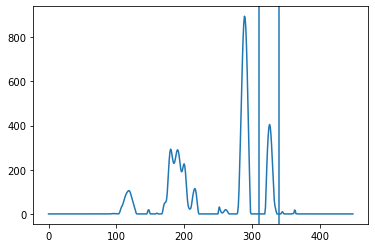

In [6]:
cut = im_rot[350:360,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)
plt.axvline(310) 
plt.axvline(340) 

In [7]:
#Defining Gaussian 

def Gauss(x,amp,mean,sigma):
    f = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return f

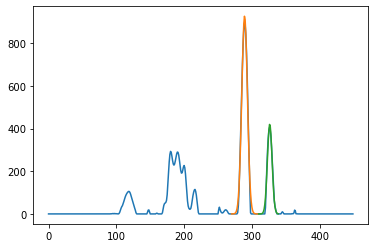

In [8]:
#Defining x and y data
plt.plot(range(450),avg_cut)

xdata = np.arange(270,310)
ydata = avg_cut[270:310]

p0 = (np.max(ydata),xdata[np.argmax(ydata)],5)

p_opt,p_cov = curve_fit(Gauss,xdata,ydata,p0)
plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))


x2data = np.arange(310,340)
y2data = avg_cut[310:340]

p0 = (np.max(y2data),x2data[np.argmax(y2data)],5)

p_opt,p_cov = curve_fit(Gauss,x2data,y2data,p0)
plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))

## Right Hand Single Gaussain Loop

In [9]:
#Creating y_cut list
ycut_list=[(260+(i*5),260+((i+1)*5)) for i in range(26)]

[21.10449251  0.19821363  0.19821363]


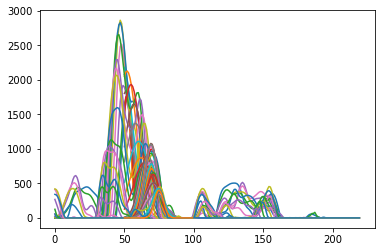

In [10]:
Model_Values = open("Secondary_RightHand_Model_Values.txt", "w")

Model_Values.write("Right Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")
#240:440
#170:340

offset_x1 = 225
offset_x2 = 275

for ycut in ycut_list:
    cut = im_rot[ycut[0]:ycut[1],220:440]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    xdata=np.arange(50,100)
    idata=avg_cut[50:100]
    
    p0 = (np.max(idata),xdata[np.argmax(idata)],5)

    p_opt,p_cov = curve_fit(Gauss,xdata,idata,p0,maxfev=800)
    
    plt.plot(range(220),avg_cut)
    plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))

        
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1] + offset_x1,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+offset_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    

   #240:440
Model_Values.close()

print(Err)

## Left Hand Single Gaussain Loop

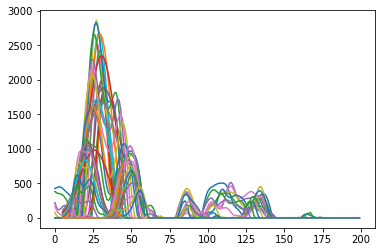

In [11]:
Model_Values = open("Secondary_LeftHand_Model_Values.txt", "w")

Model_Values.write("Left Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")
#50,250

offset_x3 = 240
offset_x4 = 330


for ycut in ycut_list:
    cut = im_rot[ycut[0]:ycut[1],240:440]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    x2data=np.arange(5,46)
    i2data=avg_cut[5:46]
    
    p0 = (np.max(i2data),x2data[np.argmax(i2data)],5)

    p_opt,p_cov = curve_fit(Gauss,x2data,i2data,p0,maxfev=800000)
    
    plt.plot(range(200),avg_cut)
    plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))

    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1] + offset_x3,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (x2data[i2data==np.max(i2data)]+offset_x4))
    Model_Values.write("%f\t" % np.max(i2data))
    Model_Values.write("\n")
    
Model_Values.close()

## Defining Linear Fit  

In [12]:
def Line_Fit(x,m,b):
    f = x*m +b
    return f


## Reading in and plotting right hand file

In [13]:
ycut_right, xfit_right = np.genfromtxt("Secondary_RightHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

print(ycut_right)

[262.5 267.5 272.5 277.5 282.5 287.5 292.5 297.5 302.5 307.5 312.5 317.5
 322.5 327.5 332.5 337.5 342.5 347.5 352.5 357.5 362.5 367.5 372.5 377.5
 382.5 387.5]


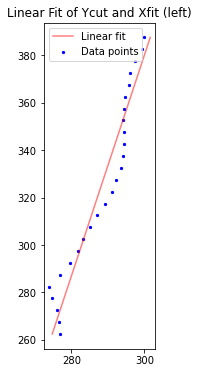

0.2148579948034189


In [14]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

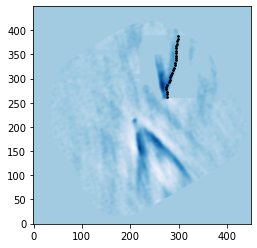

In [15]:
plt.imshow(im_rot,cmap='Blues',origin='lower')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
ax.plot(ycut_right, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')


## Reading in and plotting left hand file

In [16]:
ycut_left, xfit_left = np.genfromtxt("Secondary_LeftHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

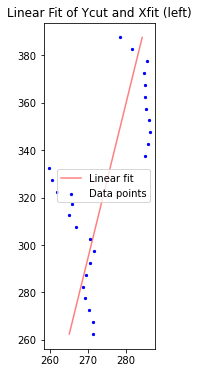

0.1535902719316244


In [17]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

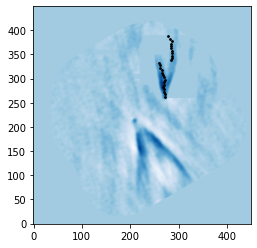

In [18]:
plt.imshow(im_rot,cmap='Blues',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
ax.plot(ycut_left, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')


In [19]:
print(xfit_left)
print(ycut_left)

[271.422497 271.330292 270.458688 269.346777 268.826549 269.54157
 270.580181 271.750299 270.598363 267.073731 265.122513 265.789628
 261.812435 260.637661 259.779172 285.147449 285.969762 286.502318
 286.193592 285.515764 285.178279 285.094978 284.973755 285.581625
 281.608273 278.41813 ]
[262.5 267.5 272.5 277.5 282.5 287.5 292.5 297.5 302.5 307.5 312.5 317.5
 322.5 327.5 332.5 337.5 342.5 347.5 352.5 357.5 362.5 367.5 372.5 377.5
 382.5 387.5]


In [20]:
xfit_left = xfit_left[:-11]

In [21]:
print(xfit_left)

[271.422497 271.330292 270.458688 269.346777 268.826549 269.54157
 270.580181 271.750299 270.598363 267.073731 265.122513 265.789628
 261.812435 260.637661 259.779172]


In [22]:
ycut_left = ycut_left[:-11]

In [23]:
print(ycut_left)

[262.5 267.5 272.5 277.5 282.5 287.5 292.5 297.5 302.5 307.5 312.5 317.5
 322.5 327.5 332.5]


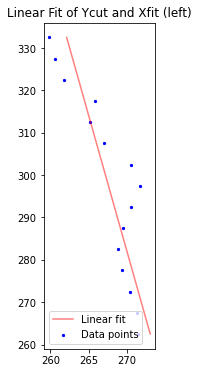

-0.1565346614285722


In [24]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

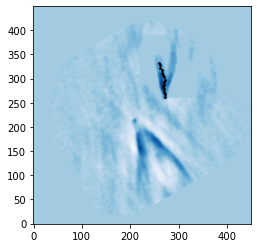

In [25]:
plt.imshow(im_rot,cmap='Blues',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
ax.plot(ycut_left, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')

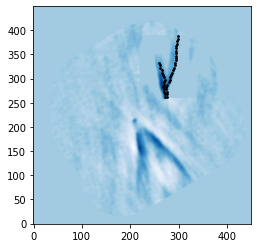

In [26]:
plt.imshow(im_rot,cmap='Blues',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
plt.savefig('Southern_Secondary_Gaussian.pdf')